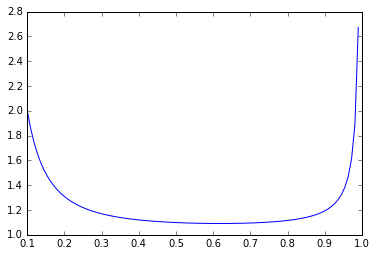

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

beta=0.9
def c(a):
    return a**2/1.5
def cc(a):
    return a*2/1.5
def omega(p):
    a=(1-beta)/(beta*p)
    temp1=(1-beta*(1-a+a*p))*cc(a)/(beta*(1-p))
    temp2=1-c(a)
    return temp1+temp2

P=np.linspace(0.1, 0.99, 100)
Omega=[]
for p in P:
    oo=omega(p)
    Omega.append(oo)

fig, ax=plt.subplots()
ax.plot(P, Omega)
plt.show()

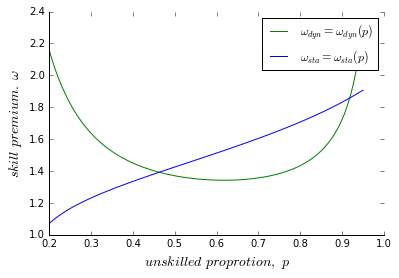

In [90]:
beta=0.9

def c(a):
    return a**2/0.4
def cc(a):
    return a*2/0.4
def omega(p):
    a=(1-beta)/(beta*p)
    temp1=(1-beta*(1-a+a*p))*cc(a)/(beta*(1-p))
    temp2=1-c(a)
    return temp1+temp2
def lhs(sigma):
    temp1=1.5-(sigma+sigma**2/2)
    temp2=sigma*(1+sigma)**2
    return temp1/temp2
def rhs(p):
    temp1=(1-p)/p
    a=(1-beta)/(beta*p)
    temp2=1-c(a)
    return temp1/temp2
from scipy.optimize import fsolve
from scipy.optimize import minimize
def ss(p):
    def static(sigma):
        return (lhs(sigma)-rhs(p))**2
    return minimize(static, 1.1, constraints=({'type': 'ineq', 'fun': lambda x: x-0.01},
                                            {'type': 'ineq', 'fun': lambda x: 1-x}))
def sss(p):
    return ss(p).x

P=np.linspace(0.2, 0.95, 100)
Omega=[]
Omega1=[]
for p in P:
    oo=omega(p)
    Omega.append(oo)
    ooo=sss(p)+1
    Omega1.append(ooo)
    
fig, ax=plt.subplots()
ax.plot(P, Omega, color='green', label=r"$\omega_{dyn}=\omega_{dyn}(p)$")
ax.plot(P, Omega1, color='blue', label=r"$\omega_{sta}=\omega_{sta}(p)$")
ax.set_xlabel(r"$unskilled\ proprotion,\ p$", fontsize=14)
ax.set_ylabel(r"$skill\ premium.\ \omega$", fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.legend()
plt.show()